## Parte 1 Taller Modelación y Simulación 4

### Integrantes:
+ Santiago Beltrán
+ Laura González 
+ Tomás Macías

### Entendimiento del negocio (CRISP-DM)
Incluye: Explicación de la problemática, preguntas de negocio que se quieren responder, posibles riesgos, las limitaciones existentes y los criterios de éxito.  

Usamos como guía "https://pdf4pro.com/amp/download?data_id=73581e&slug=crisp-dm-1-the-modeling-agency-com".

Repositorio del dataset: "https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175"


En el entendimiento del negocio, según nuestra guía, se realizan las siguientes tareas: 
- Determinar los objetivos del negocio
- Evaluar el panorama
- Determinar las metas de la minería de datos
- Producir un plan del proyecto



#### Evaluar el panorama
El conjunto de datos que se nos proporciona lleva por nombre “Conjunto de datos del Estudio 175 del Grupo de Ensayos Clínicos sobre el SIDA”. Esta recopilación fue financiada por el Instituto Nacional de Alergias y Enfermedades Infecciosas, así como por las Unidades del Centro General de Investigación, respaldadas por el Centro Nacional de Recursos para la Investigación, ambos organismos de los Estados Unidos.

Los datos representan historiales clínicos de pacientes mayores de 12 años, estadounidenses con SIDA. Los pacientes fueron seleccionados de manera aleatoria, exceptuando aquellos que poseían algunas de las condiciones siguientes: alergias al ddc, ddl o AZT; neuropatía periférica de grado 2 o mayor; pancreatitis aguda o crónica; terapia aguda para una infección o enfermedad en los últios 14 días; reciente abuso de alcohol. Para este estudio, se asignó a cada paciente un tratamiento al azar de AZT, AZT y ddl, AZT y ddc, o ddl; esto se realizó durante al menos dos años

El SIDA es causado por el VIH (Virus de la Inmunodeficiencia Humana), este no tiene cura. El VIH fue identificado en 1983 (https://www.nobelprize.org/prizes/medicine/2008/barre-sinoussi/facts/), mientras que el dataset fue publicado, por primera vez, 13 años después (1996).

#### Determinar los objetivos del negocio
Conociéndo la fuente de los datos, así como los organismos que financiaron este estudio, los objetivos del negocio serán los siguientes:
- Describir la población afectada.
- Determinar la eficacia y seguridad de distintos tratamientos, para encontrar el que mejor prevenga la progresión del VIH
- Predecir qué pacientes morirán en cierto intervalo de tiempo.

### Preguntas de negocio.
- ¿Cómo se puede describir la población afectada por VIH y posteriormente SIDA?
- ¿Cual es la eficacia de cada tratamiento suministrado, y cual provee una mejor prevención al progreso del VIH?
- ¿Qué pacientes son propensos a morir en un intervalo de tiempo determinado?


#### Éxito del negocio
El éxito de negocio se da en el caso de que se pueda determinar y predecir correctamente la muerte de pacientes, y tomar la decisión correcta respecto a la seguridad y eficacia de los tratamientos usados en los pacientes que padecen de VIH o SIDA.

#### Riesgos del negocio
Existen algunos riesgos para llevar a cabo este negocio, estos son: mal uso de tratamiento de datos personales del paciente e información sensible (como la raza, orientación sexual, etc); que el tratamiento pueda causar algún efecto secundario a un paciente, de manera que afecte significativamente y de manera negativa al paciente; que el paciente decida retirarse del tratamiento por motivos personales, antes del tiempo determinado.

### Limitaciones del negocio
Una limitación posible del negocio es la confiabilidad de los datos por la época en los cuales fueron registrados. Es decir, posibles respuestas erróneamente diligenciadas al poder contener información sensible. Otra limitación es la restricción geográfica y demográfica, al ser todos los pacientes Americanos, lo que limita la variabilidad socioeconómica, étnica y geográfica. 



#### Determinar las metas de la minería de datos
El propósito del dataset, según su repositorio, fue recopilar información útil para determinar los rendimientos de tipos de tratamiento del VIH. Además, servir para entrenar modelos predictivos que puedan determinar si un paciente morirá cierto tiempo después 

Para esto se recolectaron 23 características, excluímos algunas de estas según las instrucciones del taller.



#### Producir un plan del proyecto
El plan inicial es el siguiente:
1. Crear un repositorio en Github para sincronizar labores del equipo.
2. Crear un diccionario de datos para entender con qué se trabaja.
3. Una vez cargados los datos, realizar un análisis exploratorio con el objetivo de clasificar su calidad.
4. Verificar si los datos son adecuados para los objetivos del negocio. En caso contrario, replantear estos últimos.
5. Caracterizar la población incluída en el dataset, hacer esto visualmente. **(Primer objetivo)**
6. Consultar los tratamientos presentes en el conjunto de datos a fin de entender qué significa esta variable.
7. Describir numérica y visualmente la efectividad de los distintos tratamientos usados en la población estudiada. **(Segundo objetivo)**
9. Desarrollar un modelo predictivo que permita determinar, en cierto intervalo de tiempo, qué pacientes morirán. **(Tercer objetivo)**
   - Explorar distintos modelos predictivos y, según las capacidades técnicas y recursos disponibles, seleccionar el más adecuado para el proyecto.
 

*Este plan debe considerarse un borrador inicial. Será ajustado conforme se evalúe la efectividad de la metodología aplicada.*

### Carga de datos 
Excluímos, según las instrucciones, las variables: oprior, z30, zprior, preanti, str2, strat, offtrt, cd40, cd420, cd80, cd820.

In [2]:
import pandas as pd
urlcsv = "http://archive.ics.uci.edu/static/public/890/data.csv"
dfs = pd.read_csv(urlcsv)
no_data = ["oprior", "z30", "zprior", "preanti", "str2", "strat", "offtrt", "cd40", "cd420", "cd80", "cd820"]
df = dfs.drop(no_data, axis=1)
df

,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,race,gender,symptom,treat
0,10056,0,948,2,48,89.8128,0,0,0,100,0,0,0,1
1,10059,1,1002,3,61,49.4424,0,0,0,90,0,0,0,1
2,10089,0,961,3,45,88.4520,0,1,1,90,0,1,0,1
3,10093,0,1166,3,47,85.2768,0,1,0,100,0,1,0,1
4,10124,0,1090,0,43,66.6792,0,1,0,100,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,990021,0,1091,3,21,53.2980,1,0,0,100,0,1,0,1
2135,990026,0,395,0,17,102.9672,1,0,0,100,1,1,0,0
2136,990030,0,1104,2,53,69.8544,1,1,0,90,1,1,0,1
2137,990071,1,465,0,14,60.0000,1,0,0,100,0,1,0,0


### Diccionario de datos
Descripción de la tabla, volumetría, descripción y tipo de cada columna, etc

"DiccionarioDeDatos.xlsx"

### Un primer análisis
#### Vistazo a los datos (head)

In [3]:
df.head()

,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,race,gender,symptom,treat
0,10056,0,948,2,48,89.8128,0,0,0,100,0,0,0,1
1,10059,1,1002,3,61,49.4424,0,0,0,90,0,0,0,1
2,10089,0,961,3,45,88.4520,0,1,1,90,0,1,0,1
3,10093,0,1166,3,47,85.2768,0,1,0,100,0,1,0,1
4,10124,0,1090,0,43,66.6792,0,1,0,100,0,1,0,0


In [4]:
df.describe().round(2)

,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,race,gender,symptom,treat
count,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00,2139.00
mean,248778.25,0.24,879.10,1.52,35.25,75.13,0.08,0.66,0.13,95.45,0.29,0.83,0.17,0.75
std,234237.29,0.43,292.27,1.13,8.71,13.26,0.28,0.47,0.34,5.90,0.45,0.38,0.38,0.43
min,10056.00,0.00,14.00,0.00,12.00,31.00,0.00,0.00,0.00,70.00,0.00,0.00,0.00,0.00
25%,81446.50,0.00,727.00,1.00,29.00,66.68,0.00,0.00,0.00,90.00,0.00,1.00,0.00,1.00
50%,190566.00,0.00,997.00,2.00,34.00,74.39,0.00,1.00,0.00,100.00,0.00,1.00,0.00,1.00
75%,280277.00,0.00,1091.00,3.00,40.00,82.56,0.00,1.00,0.00,100.00,1.00,1.00,0.00,1.00
max,990077.00,1.00,1231.00,3.00,70.00,159.94,1.00,1.00,1.00,100.00,1.00,1.00,1.00,1.00


#### Estadísticos descriptivos (describe)

#### Análisis de lo visto hasta el momento



**Hay 2139 registros**, a continuación un análisis variable a variable excluyendo el id del paciente.

- Time (Tiempo hasta fallecimiento o pérdida de registro del paciente): Se supone sobre esta variable que es tiempo en días, pues no se encontró información al respecto. En promedio pasan $879$ días hasta que el paciente fallece o se pierde registro del mismo, hay una desviación estandar significativa que representa aproximadamente un tercio del promedio. Notablemente, el primer cuartil (25%) se haya $997 - 727 = 270$ unidades a la izquierda de la media (50%), esta último se haya a $1091 - 997 = 94$ unidades a la izquierda del tercer cuartil (75%), esto sugiere una distribución con asimetría negativa. A esta misma conclusión llegamos comparando mediana y media.

- Trt (Tipo de tratamiento): Al ser un categórico no resultan muy útiles los estadísticos descriptivos del promedio, desviación estándar, entre otros. Podemos asegurar que se usaron todos los tratamientos pues todos aparecen.

- Age (edad): El promedio de la edad de la población estudiada es de 35.25 años. Sin embargo, los pacientes van desde los 12 hasta los 70 años. La mediana es de 34 años, lo cual, junto al promedio, puede indicar una distribución con asimetría positiva lo que denota en este caso que la población tiende a ser menor al promedio.

- Wtkg (peso en kg): En promedio, los pacientes pesan 75.13 kg. El rango de pesos es, al igual que de edades, bastante amplio. Concretamente el rango de pesos es de $159.94 - 31 = 128.94$ kg. La diferencia entre la media y la mediana es de $75.13 - 74.39 = 0.74 \approx 0$. Esto sugiere una distribución centradada.

- Hemo (condición hemofilia): A partir de los estadísticos descriptivos vemos que esta condición es algo rara, pues al menos el 75% no la tienen. Vemos que está en el dataset pues en la tabla el máximo es 1.

- Homo (ser homosexual [binario]): El promedio de 2139 filas de esta variable binaria (con valores 0 y 1) es de $0.66$. A partir de esto podemos saber que el 66% de los pacientes con SIDA son homosexuales, esto contrasta con la proporción entre personas sanas (en nuestra experiencia), por tanto es posible que la población homosexual esté más expuesta al SIDA.

- Drugs (antecedentes con drogas intravenosas): Haciendo similar análisis a la variable Homo, se estima que un 13% de la población tiene un historial de uso de drogas. 

- Karnof (escala Karnofsky): Los estadísticos descriptivos muestran que, en general, los pacientes tienen síntomas leves (promedio 95.45 con desviación estandar de sólo 5). El mínimo en la escala registrado es de 70 lo cuál es, según esta, equivalente a ser capaz de cuidarse por si mismo pero no de hacer alguna activdad o trabajo normal.

- Race (blanco o no blanco): Igual análisis a las demás variables binarias, el 29% de los pacientes son no blancos, esto corresponde a la distribución racial estadounidense.

- Gender (género hombre / mujer): EL promedio es de 0.83, como 1 representa "Hombre" para esta variable binaria, el 83% de los pacientes son hombres. Esto, junto con la prevalencia de personas homosexuales en la muestra, parece indicar ya sea un sesgo a elegir hombres homosexuales, o una predisposición de estos a contagiarse.

- Symptom (síntomas clínicos al inicio): El promedio es de 0.17, 1 representa "Sintomático" para la variable binaria. Entonces, el 17% de los pacientes presentaba síntomas clínicos al inicio. Que tantos pacientes sean asintomáticos resulta interesante pues significa que sospechaban haber sido contagiados. 

- Treat (binario si se usa ZDV sólo o no): El promedio es de 0.75, es decir, el 75% de los pacientes son tratados utilizando solamente ZDV.

- Cid (indicador de censura binario): El promedio es de 0.24, es decir, el 24% de los pacientes del estudio fallecieron. Aquí puede haber confusión sobre el significado de Cid, decidimos interpretarlo como 1 es fallecimiento derivado del propósito del dataset, de lo contrario: ¿cómo podría este servir para entrenar un modelo que prediga quienes fallecen en un intervalo dado?.

### Análisis de calidad de los datos

#### ¿ Qué dimensiones de calidad de datos se van a analizar?

1. Completitud:
La dimensión de completitud consiste en el porcentaje de datos llenos en comparación a el total de datos.
 
2. Conformidad / Validez:
Significa que los datos deben ser representados con un formato constante, adheriendose a un tipo de dato específico.
 
3. Consistencia:
Los datos son congruentes entre sí, todas las relaciones existentes entre las variables son ciertas y pueden representar situaciones del mundo real, se identifican relaciones anómalas.

4. Precisión/ Exactitud:
El dato por si solo es coherente, lógico y verdadero. Se usa para saber la diferencia entre los datos almacenados con los reales.

5. Duplicidad / Unicidad:
Se refiere a la ocurrencia única de un objeto al ser grabado en el dataset.

6. Integridad:
Es el grado en el que las varias fuentes de datos están sincronizadas, y que los cambios que hay en una fuente se refleje en otra.

#### - Completitud:

In [5]:
#Para revisar datos incompletos, sumar nulos.
df.isna().sum()

pidnum     0
cid        0
time       0
trt        0
age        0
wtkg       0
hemo       0
homo       0
drugs      0
karnof     0
race       0
gender     0
symptom    0
treat      0
dtype: int64

Se ve que todas las columnas tienen 0 datos nulos. Debido a que no hay datos faltantes, no hay que hacer un tratamiento para ellos.

Sin embargo, se considera que aunque las columnas no tienen datos incompletos, se podría completar el dataset con otras variables como la estatura, ya que puede ser útil para detectar anomalías y crear el índice de masa corporal. Este índice puede tener mayor correlación con otras variables, pero la información se pierde. 
Además, se podrían agregar otras variables que describan la salud del paciente, y que influyen en la progresión o mortalidad. La falta de estas hace que no se logre predecir correctamente, al ingorar variables explicativas actuales.


#### - Conformidad/Validez:

Para analizar la validez revisaremos que todas las variables realmente son del tipo que dicen ser.

**Sólo hay hombres y mujeres**


In [6]:
df[(df["time"]<=0 )| (df["wtkg"]<= 0)]

,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,race,gender,symptom,treat


**No hay tiempo ni peso negativo**

In [7]:
# Según el repositorio, hay 4 tratamientos posibles [0, 1, 2, 3] esto se confirma aquí.
df["trt"].value_counts().sort_index()

trt
0    532
1    522
2    524
3    561
Name: count, dtype: int64

**Verificación de variables binarias**

In [8]:
df["homo"].value_counts()

homo
1    1414
0     725
Name: count, dtype: int64

In [9]:
df["gender"].value_counts()

gender
1    1771
0     368
Name: count, dtype: int64

In [10]:
df["cid"].value_counts()

cid
0    1618
1     521
Name: count, dtype: int64

In [11]:
df["hemo"].value_counts()

hemo
0    1959
1     180
Name: count, dtype: int64

In [12]:
df["race"].value_counts()

race
0    1522
1     617
Name: count, dtype: int64

In [13]:
df["symptom"].value_counts()

symptom
0    1769
1     370
Name: count, dtype: int64

In [14]:
df["treat"].value_counts()

treat
1    1607
0     532
Name: count, dtype: int64

In [15]:
df["drugs"].value_counts()

drugs
0    1858
1     281
Name: count, dtype: int64

In [16]:
# Los valores de la Escala Karnofsky se definen en el intervalo [0, 100].
# No hay ningún dato fuera de este rango, es consistente.
df[(df["karnof"] < 0) | (df["karnof"] > 100)]

,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,race,gender,symptom,treat


In [17]:
# Se confirma el rango de edades visualmente

df[(df["age"] < 20) | (df['age'] > 60)]['age'].value_counts().sort_index()

age
12    3
13    3
14    6
15    3
16    7
17    4
18    7
19    7
61    2
62    5
63    6
64    2
65    3
66    1
67    2
68    2
69    1
70    2
Name: count, dtype: int64

El resto de las variables enteras y binarias cuentan con valores que no se salen de lo que son.

#### - Consistencia:


In [18]:
df[["wtkg", "age", "karnof"]].describe().T[["mean","std","min","max"]]

,mean,std,min,max
wtkg,75.125311,13.263164,31.0,159.93936
age,35.248247,8.709026,12.0,70.00000
karnof,95.446470,5.900985,70.0,100.00000


Note que el peso tiene una variación enorme, hay individuos de 31 kilos y otros de 160. Esto puede representar anomalías. A continuación valores que pueden estimar valores extremos de obesidad y desnutrición

In [19]:
print(df[df["wtkg"] > 120].shape[0])
print(df[ (df["wtkg"] < 40) & (df["age"]>15)].shape[0])

12
1


In [20]:
# Revisemos estos registros

df[df["wtkg"] > 120][["pidnum", "age", "wtkg"]]

# Se ve razonable.

,pidnum,age,wtkg
304,50629,46,123.37920
629,110717,36,120.65760
945,170972,38,130.63680
1060,190408,39,127.70000
1084,210039,30,149.00000
1177,220432,30,129.00000
1441,251059,45,127.00800
1569,270883,28,125.64720
1622,300517,31,122.47200
1707,320357,28,159.93936


In [21]:
df[(df["wtkg"] < 40) & (df["age"]>15)]

# Esta persona tiene 30 años y pesa 36.78 kg con un karnof de 90. Se ve sospechoso.

,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,race,gender,symptom,treat
1931,610043,0,225,2,30,36.78696,0,1,0,90,0,1,0,1


In [22]:
df[(df["wtkg"] < 40)]

,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,race,gender,symptom,treat
1931,610043,0,225,2,30,36.78696,0,1,0,90,0,1,0,1
2014,910034,0,1121,2,13,32.65920,1,0,0,100,0,1,1,1
2072,950056,1,324,1,12,31.00000,1,0,0,100,0,1,0,1


In [23]:
# La variable treat se puede obtener de trt, entonces, cuando trt sea 0 treat debe ser 0. 
# Vemos que no hay instancias donde esto no se cumpla. La variable treat es lo que dice ser.

print(df[(df["trt"] == 0) & (df["treat"] == 0)].shape[0])
print(df[df["treat"] == 0].shape[0])

532
532


             age    karnof
age     1.000000 -0.084544
karnof -0.084544  1.000000


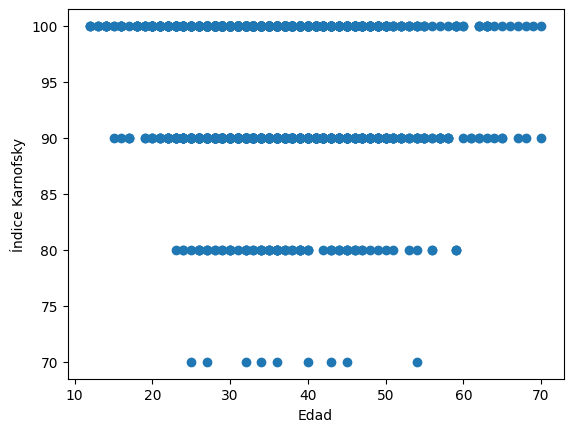

In [24]:
import matplotlib.pyplot as plt
print(df[['age', 'karnof']].corr(method='spearman'))
plt.scatter(df['age'], df['karnof'])
plt.xlabel('Edad')
plt.ylabel('Índice Karnofsky')
plt.show()


Hay una correlacion negativa entre edad y karnofsky, el cual es esperado al debilitarse el sistema inmune y reducirse la funcionalidad física de los pacientes.

            wtkg    karnof
wtkg    1.000000  0.040878
karnof  0.040878  1.000000


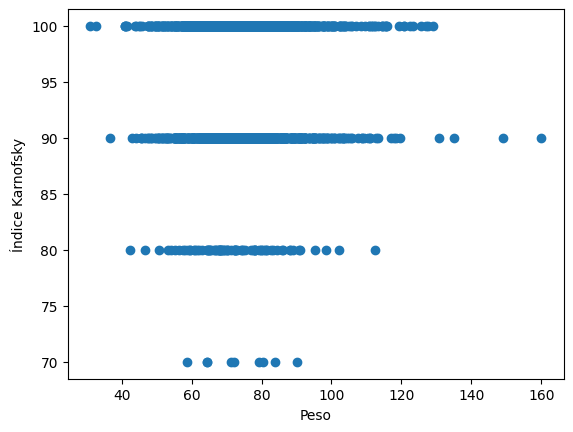

In [25]:
print(df[['wtkg', 'karnof']].corr(method='spearman'))
plt.scatter(df['wtkg'], df['karnof'])
plt.xlabel('Peso')
plt.ylabel('Índice Karnofsky')
plt.show()

La correlación entre peso y karnofsky puede variar, al tener menor puntaje en pesos extremos, pero valores altos en pesos saludables

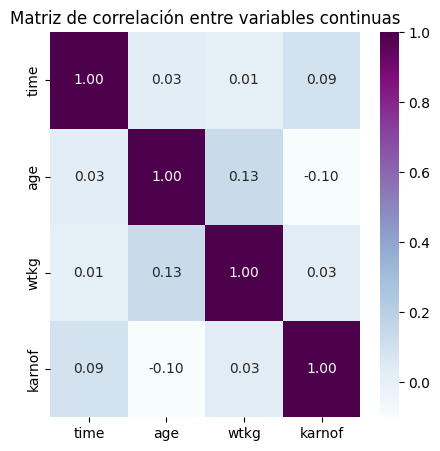

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

vars_numericas = ["time", "age", "wtkg", "karnof"]
corr = df[vars_numericas].corr(method="pearson")

plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="BuPu")
plt.title("Matriz de correlación entre variables continuas")
plt.show()


## Detección de outliers unidimensionales para edad, peso y coeficiente de Karnofsky

Decidimos detectar los outliers en estas variables ya que tienen el mayor impacto en la condición de salud del paciente. 



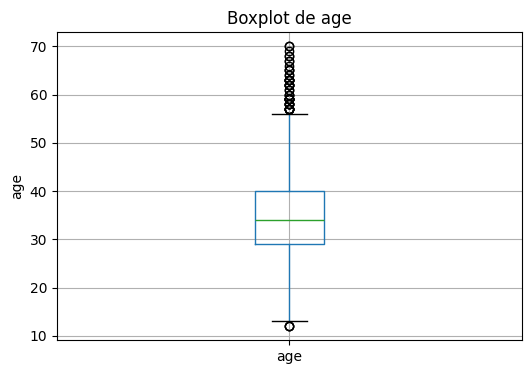

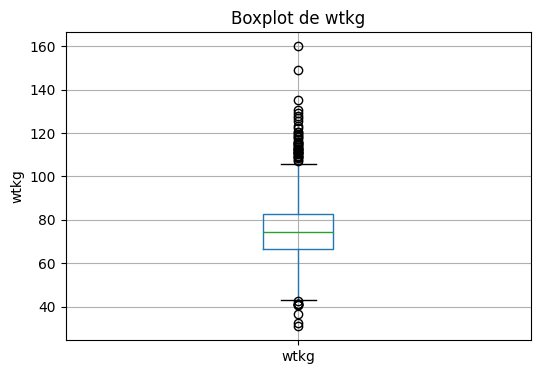

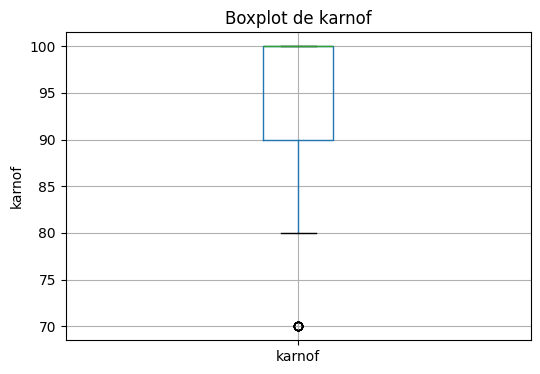

In [27]:
import matplotlib.pyplot as plt
urlcsv = "http://archive.ics.uci.edu/static/public/890/data.csv"
df = pd.read_csv(urlcsv)
vars_interes = ['age', 'wtkg', 'karnof']

# Un boxplot separado para cada variable
for var in vars_interes:
    plt.figure(figsize=(6,4))
    df.boxplot(column=var)
    plt.title(f'Boxplot de {var}')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()

### Detección de outliers para edad y peso
Se usó un método de distancia de mahalanobis y además el DBSCAN para encontrar datos que no se acumulan. Los resultados de outliers dependen evidentemente de la distancia que tiene la curva de contorno de mahalanobis y el radio que se usa en el DBSCAN.


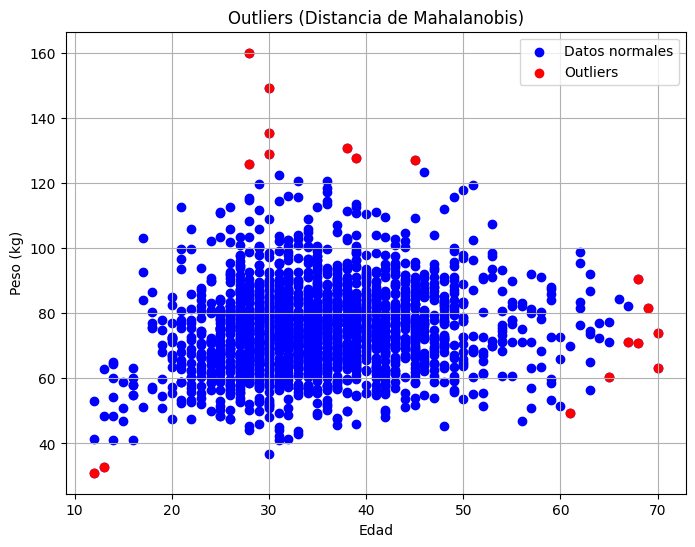

,age,wtkg
1,61,49.4424
49,67,71.0000
104,70,73.9368
271,68,90.5000
518,68,70.7616


In [28]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

# Cargar los datos nuevamente
file_path = "http://archive.ics.uci.edu/static/public/890/data.csv"
df = pd.read_csv(file_path)

# Seleccionar variables relevantes
data = df[['age', 'wtkg']]

# Calcular media y matriz de covarianza
mean_vec = np.mean(data, axis=0)
cov_matrix = np.cov(data, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Función para distancia de Mahalanobis
def mahalanobis_distance(x, mean_vec, inv_cov_matrix):
    x_minus_mu = x - mean_vec
    return np.sqrt(x_minus_mu @ inv_cov_matrix @ x_minus_mu.T)

# Calcular distancias
distances = data.apply(lambda row: mahalanobis_distance(row, mean_vec, inv_cov_matrix), axis=1)

# Umbral para p < 0.001
threshold = np.sqrt(chi2.ppf(0.999, df=data.shape[1]))
outliers = distances > threshold
outlier_points = data[outliers]

# Gráfico
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['wtkg'], c='blue', label='Datos normales')
plt.scatter(outlier_points['age'], outlier_points['wtkg'], c='red', label='Outliers')
plt.xlabel('Edad')
plt.ylabel('Peso (kg)')
plt.title('Outliers (Distancia de Mahalanobis)')
plt.legend()
plt.grid(True)
plt.show()

outlier_points.head()

Número de outliers detectados: 21


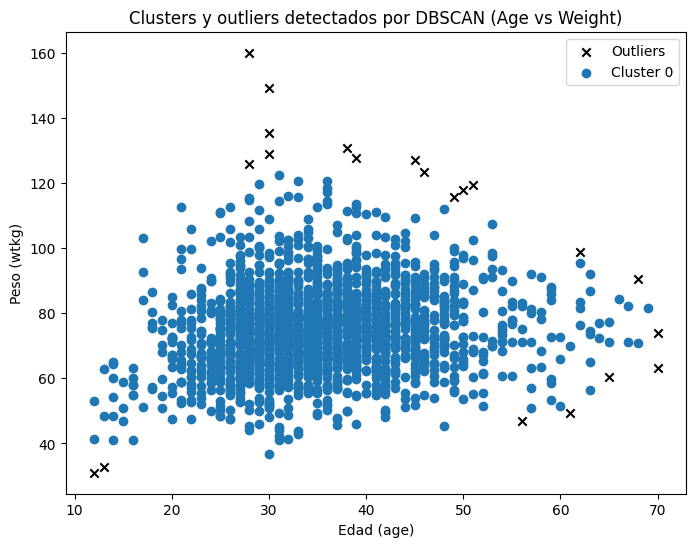

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Cargar los datos nuevamente
file_path = "http://archive.ics.uci.edu/static/public/890/data.csv"
df = pd.read_csv(file_path)

data = df[['age', 'wtkg']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
dbscan = DBSCAN(eps = 0.6, min_samples = 10)
labels = dbscan.fit_predict(data_scaled)

data_outliers = data.copy()
data_outliers['cluster'] = labels

outliers_detectados = data_outliers[data_outliers['cluster'] == -1]
print(f"Número de outliers detectados: {outliers_detectados.shape[0]}")
labels = data_outliers['cluster'].values
unique_labels = np.unique(labels)

plt.figure(figsize=(8,6))

for lab in unique_labels:
    idx = labels == lab
    if lab == -1:
        # Outliers (DBSCAN noise)
        plt.scatter(data_outliers.loc[idx, 'age'],
                    data_outliers.loc[idx, 'wtkg'],
                    c='black', marker='x', label='Outliers')
    else:
        plt.scatter(data_outliers.loc[idx, 'age'],
                    data_outliers.loc[idx, 'wtkg'],
                    label=f'Cluster {lab}')

plt.title("Clusters y outliers detectados por DBSCAN (Age vs Weight)")
plt.xlabel("Edad (age)")
plt.ylabel("Peso (wtkg)")
plt.legend()
plt.show()

#### - Precisión/Exactitud:

Para la precisión se analizará si las variables están en rangos normales, especificamente para el peso y la edad. 


In [30]:
df[(df["wtkg"] > 200 ) | (df["wtkg"] < 20)]

,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820


In [31]:
df[(df["age"] > 100) | (df["age"]<0)]

,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820


Hay fallas en la precisión en la variable race, al representar de manera precisa únicamente los individuos blancos. Aquellos registros con valor de race = 1, no se les puede representar de manera precisa al únicamente poder decir que el individuo no es blanco. Esto puede tener relevancia, ya que se pierde información en la correlación entre la raza y otras variables.

#### - Duplicidad/Unicidad:

In [32]:
df.duplicated().sum()

np.int64(0)

No existen registros repetidos

In [33]:
# Cada paciente tiene un id único.
df['pidnum'].is_unique

True

#### - Integridad:

Todos los datos provienen de una misma fuente, al sólo haber una fuente de datos es evidente que debe estar sincronizada consigo misma. Es decir, los datos cumplen con la dimensión de calidad "integridad". 

## Pasos futuros a desarrollar
Antes de continuar de pasar a otros pasos del CRISP-DM, se debería de revisar la posibilidad de usar datos mas recientes, esoecialmente que cumplan con las dimensiones de completitud y precisión según con lo escrito anteriormente. 
Además, se debe preparar los datos, especialmente crear nuevas variables más descriptivas para poder predecir la mortalidad.
Se debe partir el dataset para entrenamiento, testeo y validación.

Después de esto, se debe proseguir con el modelado, en el cual se debe de escoger un modelo de clasificación.

Para la evaluación se debe evaluar el desempeño del modelo con algunos estadísticos y medidas de error. También, se debe ver si el modelo cumple los objetivos de negocio.

En caso tal, se puede proceder con el despliegue, el cual incluye la documentación de resultados y subir el modelo, ya sea a un servidor, a un servicio cloud o a un contenedor, etc.




# Punto 2

In [34]:
#a)
dfg = df2.groupby('State')['Adult smoking'].mean().sort_values(ascending=False)
print(dfg.head(5))


#b)
import sqlite3  
import sqlalchemy as sqla

db = sqla.create_engine('sqlite:///datos.sqlite')
df.to_sql('datos', con=db, if_exists='append', index=False)

tabla = pd.read_sql("SELECT * FROM datos", db)
query = """SELECT State, AVG("Adult smoking") AS "Smoking rate" FROM datos GROUP BY State ORDER BY "Smoking rate" DESC LIMIT 5;"""

resultado = pd.read_sql(query, db)
resultado

NameError: name 'df2' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib

In [ ]:
df2 = pd.read_csv("CountyHealthData_2014-2015.csv")
df2

### Condados con FEI mayores a 9 (Usando filtrado de Pandas)

In [ ]:
dfFEI9 = df2[df2["Food environment index"]>=9]
dfFEI9u = dfFEI9.drop_duplicates(['State','County'])

In [ ]:
dfFEI9["State"].value_counts().head(5)

### Condados con FEI mayores a 9 (Usando SQLite)

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite:///countyhealth.db', echo=False)
county_health = df2.to_sql('county_health', con = engine, index = False, if_exists = 'replace')

In [ ]:
query = """ 
SELECT State, County, [Food environment index]
FROM county_health
WHERE [Food environment index] >= 9
"""
df2_filtrado = pd.read_sql(query, con = engine)

top5_estados = (df2_filtrado.groupby('State')
               .size()
                .sort_values(ascending = False)
                .head(5)
               
               )

print(df2_filtrado.head())
print(top5_estados)                

## Santiago vos haces el punto 3 del intropandas, o sea hacer el punto 1.a y 1.b con ese problema


## ¿Qué estados tienen más de 100 condados? (Pandas)

In [ ]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━ 8.4/9.8 MB 51.4 kB/s eta 0:00:28m:14

In [ ]:
import plotly.express as px
df2_u = df2.drop_duplicates("FIPS")
condados_por_estado = df2_u.groupby('State')['FIPS'].count().reset_index(name = 'num_condados')
estados_mas_de_100 = condados_por_estado[condados_por_estado['num_condados'] >= 100]
estados_mas_de_100

fig = px.treemap(estados_mas_de_100,
                 path=['State'],
                 values='num_condados',
                 title='Estados con más de 100 condados únicos')
fig.show()

## ¿Qué estados tienen más de 100 condados? (SQLite)

In [36]:
!pip install squarify

('TX', 237)
('GA', 159)
('VA', 133)
('KY', 120)
('MO', 115)
('IL', 102)
('KS', 101)
('NC', 100)


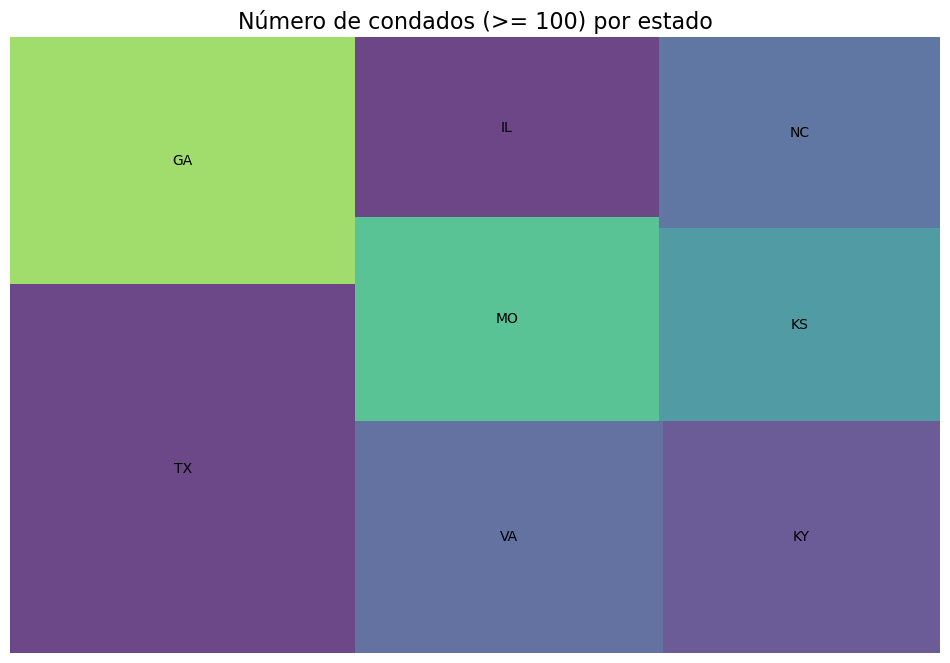

In [74]:
import pandas as pd
from sqlalchemy import create_engine, MetaData, Table, select, func
import matplotlib.pyplot as plt
import squarify

# 1. Leer CSV
df = pd.read_csv("CountyHealthData_2014-2015.csv")

# 2. Guardarlo en SQLite en una tabla nueva
engine = create_engine("sqlite:///healthdata.db")
df.to_sql("county_health_new", engine, if_exists="replace", index=False)

# 3. Reflejar la tabla
metadata = MetaData()
metadata.reflect(bind=engine)

county_health = Table("county_health_new", metadata, autoload_with=engine)

# 4. Query: contar condados únicos por estado y filtrar los >100
stmt = (
    select(
        county_health.c.State,
        func.count(func.distinct(county_health.c.FIPS)).label("num_condados")
    )
    .group_by(county_health.c.State)
    .having(func.count(func.distinct(county_health.c.FIPS)) >= 100)
    .order_by(func.count(func.distinct(county_health.c.FIPS)).desc())
)

with engine.connect() as conn:
    result = conn.execute(stmt).fetchall()

for row in result:
    print(row)


# Convertir el resultado en DataFrame
result_df = pd.DataFrame(result, columns=['State', 'num_condados'])

# Graficar treemap
plt.figure(figsize=(12,8))
squarify.plot(sizes=result_df['num_condados'], 
              label=result_df['State'], 
              alpha=0.8)

plt.title('Número de condados (>= 100) por estado', fontsize=16)
plt.axis('off')
plt.show()

## Punto 3

Suponga que Ana, Bernardo y Camila son 3 amigos... 

Fuerza bruta! (Enfoque de simulación)

In [16]:
import random
import pandas as pd
from itertools import permutations

# Probabilidades
prob = {
    'ana': 0.7,
    'bernardo': 0.3,
    "camila": 0.1
}

# Tamaño de simulación
N = 10000

# Constantes de tiempos
tiempo_en_acomodarse_en_segs = 8
tiempo_por_lanzamiento_en_segs = 5

ordenes = permutations(prob.keys())


def hacer_reto(orden, intentos, tiempo, lanzaron):
    '''
    cree un código que de forma aleatoria empiece a jugar varias el reto hasta 
    que lo ganen (es decir, hasta que los tres encesten correctamente), 
    registrando cuántos intentos totales hubo y en cada intento quienes 
    alcanzaron a lanzar, y además registrar cuánto tiempo en total se tomaron en 
    terminar todo el reto. 
    '''
    lanzaron.append(set())
    intentos += 1
    
    # Se acomodan
    tiempo += 8
    exito = False

    for nombre in orden:
        while True:
            # Hace el tiro
            tiempo += 5
            lanzaron[intentos-1].add(nombre)
            
            # Si la encesta
            if random.random() <= prob[nombre]:
                break

            # Si no la encesta, inicia otro intento.
            else:
                return hacer_reto(orden, intentos, tiempo, lanzaron)
                

            # Si no pasa lo anterior, sigue lanzando.

    # Al terminar el intento, retorne los datos recopilados.
    return (orden, intentos, tiempo, lanzaron)


In [17]:
import pandas as pd

resumen_records = []
historial_records = []

for orden in ordenes:
    orden_str = "->".join(orden)  
    for i in range(1, 10001):  # 10,000
        orden_sim, intentos, tiempo, lanzaron = hacer_reto(orden, 0, 0, [])

        resumen_records.append((orden_str, i, intentos, tiempo))

        for j, lanz in enumerate(lanzaron, start=1):
            historial_records.append((orden_str, i, j, lanz))

# Build DataFrames once at the end
df_resumen = pd.DataFrame.from_records(
    resumen_records,
    columns=["orden", "n-reto", "intentos", "tiempo (segs)"]
).set_index(["orden", "n-reto"])

df_historial = pd.DataFrame.from_records(
    historial_records,
    columns=["orden", "n-reto", "intento", "lanzaron"]
).set_index(["orden", "n-reto", "intento"])


In [18]:
df_resumen

intentos  tiempo (segs)
orden                 n-reto                         
ana->bernardo->camila 1              2             36
                      2             98           1729
                      3            171           3008
                      4             65           1125
                      5             68           1189
...                                ...            ...
camila->bernardo->ana 9996          23            314
                      9997           3             49
                      9998          51            688
                      9999          34            477
                      10000         62            841

[60000 rows x 2 columns]

In [44]:
df_historial

lanzaron
orden                 n-reto intento                         
ana->bernardo->camila 1      1                {ana, bernardo}
                             2                {ana, bernardo}
                             3                {ana, bernardo}
                             4                {ana, bernardo}
                             5        {camila, ana, bernardo}
...                                                       ...
camila->bernardo->ana 10000  1             {camila, bernardo}
                             2             {camila, bernardo}
                             3             {camila, bernardo}
                             4        {camila, ana, bernardo}
                             5        {camila, ana, bernardo}

[1053013 rows x 1 columns]

In [25]:
# Para elegir uno en particular...

df_resumen.loc["ana->bernardo->camila"]

,intentos,tiempo (segs)
n-reto,,
1,8,174
2,5,110
3,7,151
4,18,359
5,34,717
...,...,...
9996,39,847
9997,29,657
9998,2,76


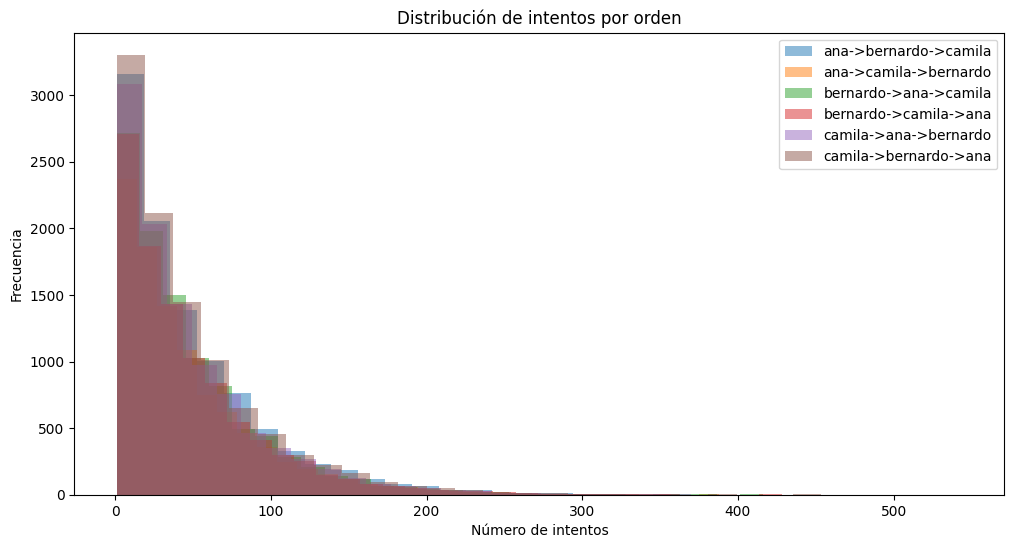

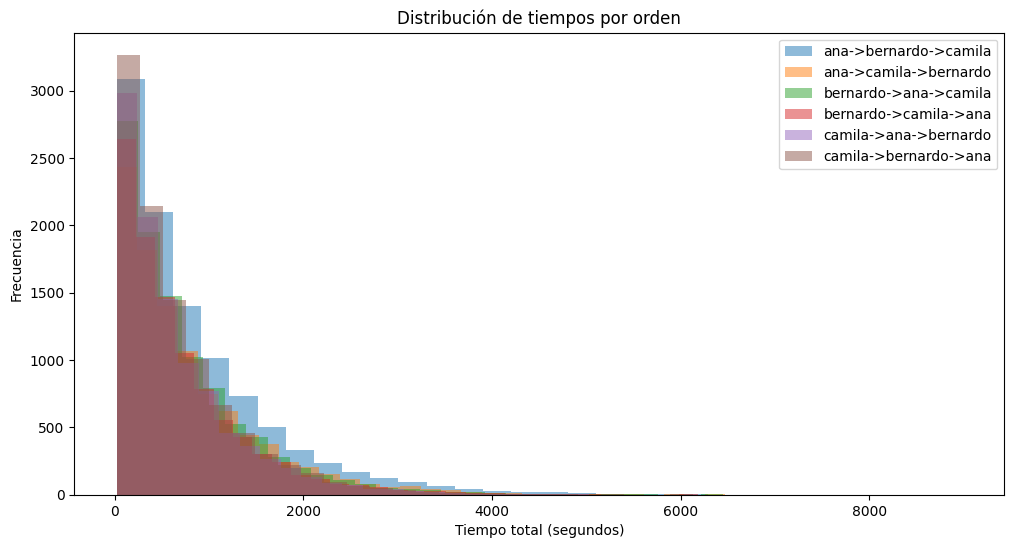

In [19]:
import matplotlib.pyplot as plt

# Obtener los órdenes únicos
ordenes_unicos = df_resumen.index.get_level_values("orden").unique()

# Crear figura
plt.figure(figsize=(12, 6))

# Histograma de intentos por cada orden
for orden in ordenes_unicos:
    subset = df_resumen.loc[orden, "intentos"]
    plt.hist(subset, bins=30, alpha=0.5, label=f"{orden}")

plt.xlabel("Número de intentos")
plt.ylabel("Frecuencia")
plt.title("Distribución de intentos por orden")
plt.legend()
plt.show()



# Histograma de tiempos por orden
plt.figure(figsize=(12, 6))

for orden in ordenes_unicos:
    subset = df_resumen.loc[orden, "tiempo (segs)"]
    plt.hist(subset, bins=30, alpha=0.5, label=f"{orden}")

plt.xlabel("Tiempo total (segundos)")
plt.ylabel("Frecuencia")
plt.title("Distribución de tiempos por orden")
plt.legend()
plt.show()


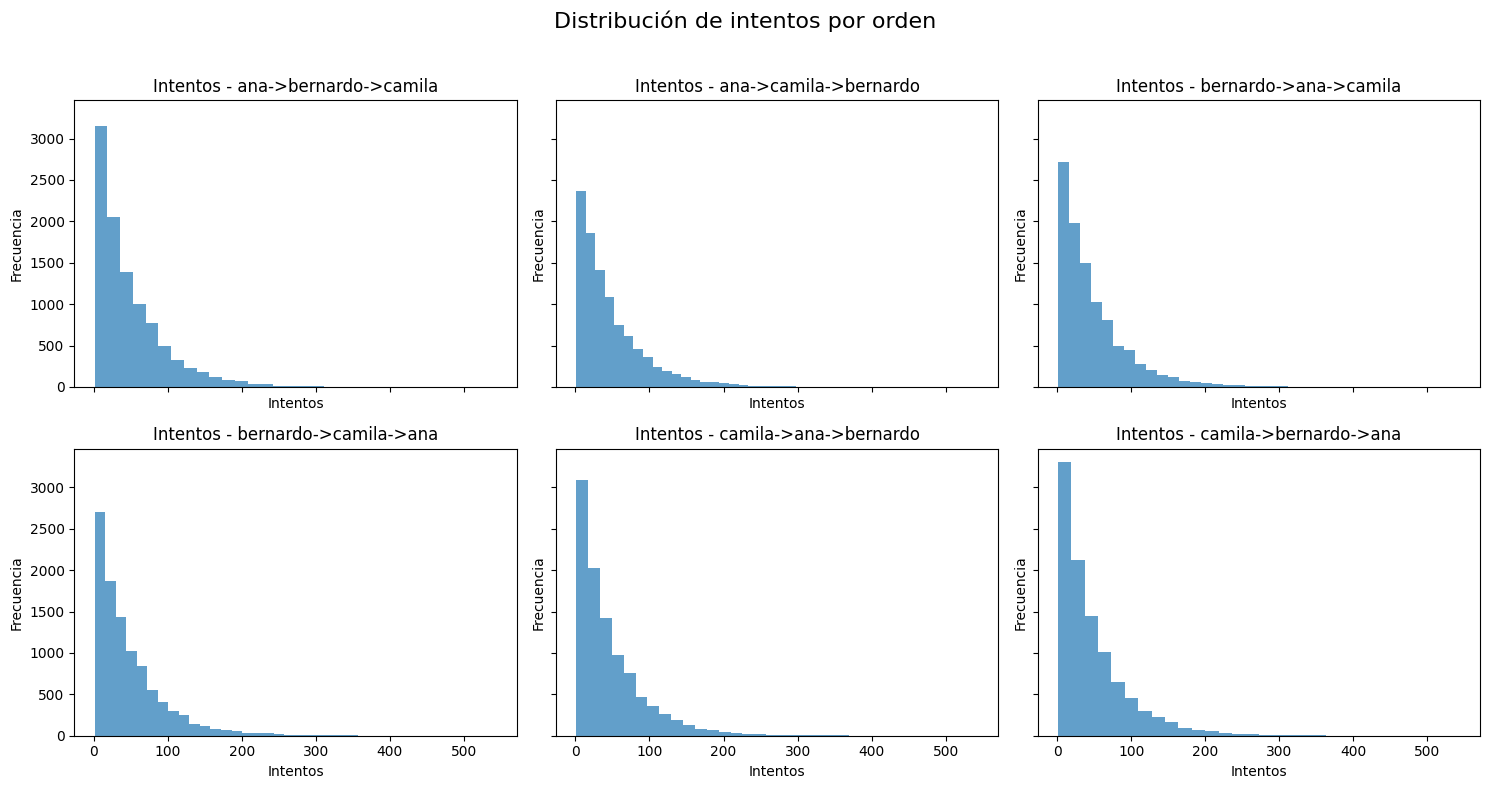

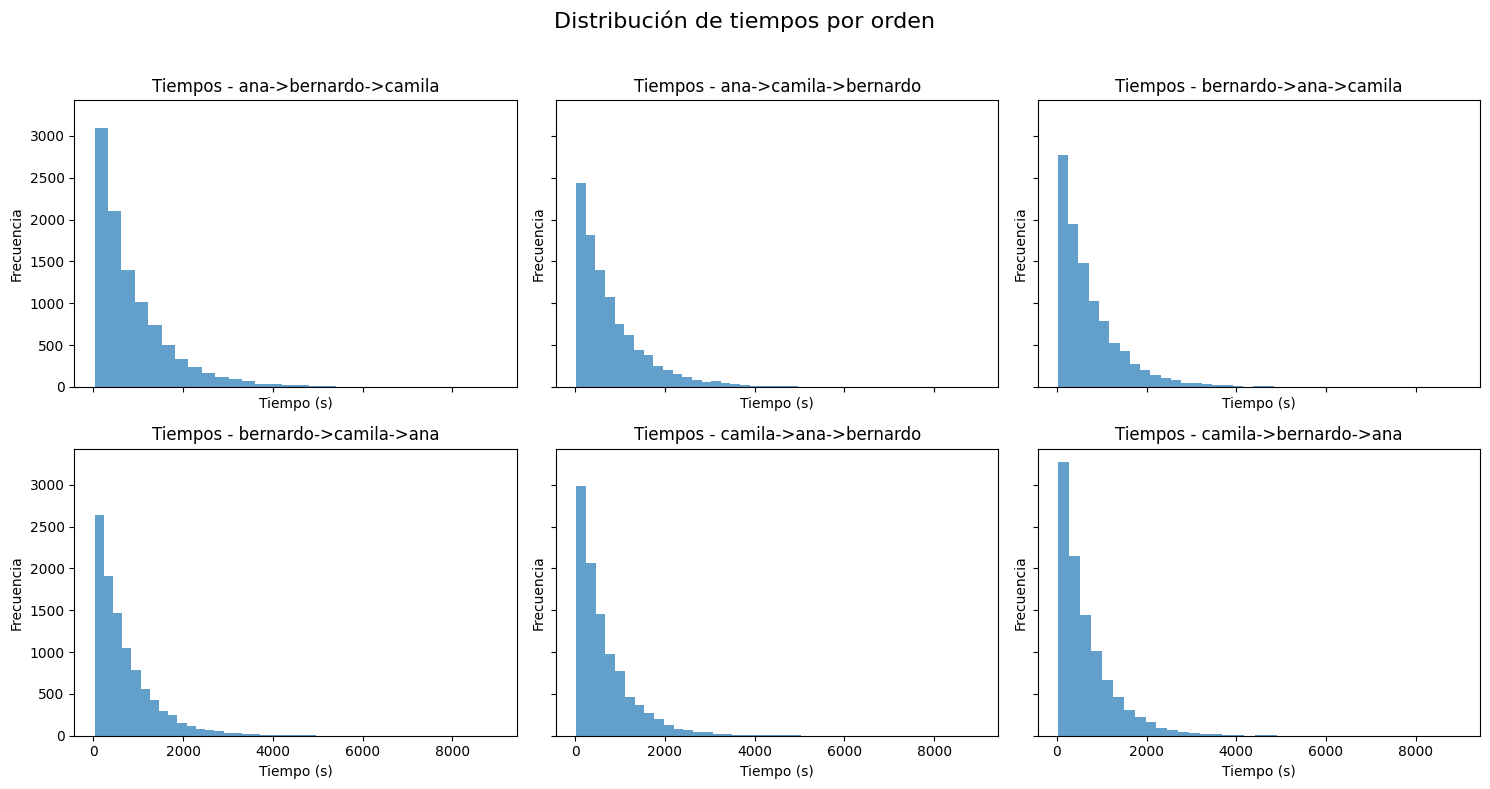

In [20]:
# En subplots...

import matplotlib.pyplot as plt



fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True, sharey=True)
axes = axes.flatten()

for ax, orden in zip(axes, ordenes_unicos):
    subset = df_resumen.loc[orden, "intentos"]
    ax.hist(subset, bins=30, alpha=0.7)
    ax.set_title(f"Intentos - {orden}")
    ax.set_xlabel("Intentos")
    ax.set_ylabel("Frecuencia")

plt.suptitle("Distribución de intentos por orden", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True, sharey=True)
axes = axes.flatten()

for ax, orden in zip(axes, ordenes_unicos):
    subset = df_resumen.loc[orden, "tiempo (segs)"]
    ax.hist(subset, bins=30, alpha=0.7)
    ax.set_title(f"Tiempos - {orden}")
    ax.set_xlabel("Tiempo (s)")
    ax.set_ylabel("Frecuencia")

plt.suptitle("Distribución de tiempos por orden", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [21]:
# ¿ Cuál es el número promedio de veces que se debe intentar el reto para ganarlo?
promedios = df_resumen.groupby(level=0).mean()

In [23]:
# Promedios ordenados por número de intentos (Menor a mayor)

promedios.sort_values("intentos")

,intentos,tiempo (segs)
orden,,
camila->ana->bernardo,47.1872,653.3431
bernardo->ana->camila,47.2417,734.9696
ana->camila->bernardo,47.3947,798.6141
bernardo->camila->ana,47.4270,694.7620
camila->bernardo->ana,48.1225,656.8225
ana->bernardo->camila,48.4709,850.5097


In [26]:
# Promedios ordenados por tiempo haciendo el reto (Menor a mayor)
promedios.sort_values("tiempo (segs)")

,intentos,tiempo (segs)
orden,,
camila->ana->bernardo,47.1872,653.3431
camila->bernardo->ana,48.1225,656.8225
bernardo->camila->ana,47.4270,694.7620
bernardo->ana->camila,47.2417,734.9696
ana->camila->bernardo,47.3947,798.6141
ana->bernardo->camila,48.4709,850.5097


In [27]:
# En promedio, sin importar el orden (si importáse se puede consultar la tabla), ¿cuál es el número de intentos que 
# se necesitan para completar el reto? ¿En cuánto tiempo?

promedios.mean()

# Es decir, entre 70 y 71 intentos.
# En 491 segundos (8.18 mins aprox).

intentos          47.640667
tiempo (segs)    731.503500
dtype: float64

In [29]:
# Note que
promedios.sort_values("tiempo (segs)").iloc[0]

# Es la configuración que menos tiempo necesita, esta corresponde al orden "camila -> bernardo -> ana" que resulta
# ser que tiren de "peor" a "mejor". 

intentos          47.1872
tiempo (segs)    653.3431
Name: camila->ana->bernardo, dtype: float64

In [31]:
# En cambio, observemos que la peor configuración es precisamente la mejor en orden inverso, es decir, tirar de 
# "mejor" a "peor".

promedios.sort_values("tiempo (segs)").iloc[-1]


intentos          48.4709
tiempo (segs)    850.5097
Name: ana->bernardo->camila, dtype: float64

In [33]:
# Experimentalmente, si se desea minimizar el número de intentos, la mejor combinación es:

promedios.sort_values("intentos").iloc[0]

# Que en la simulación es también la más rápida ("peor" a "mejor")

intentos          47.1872
tiempo (segs)    653.3431
Name: camila->ana->bernardo, dtype: float64

### Ahora sí... Analíticamente

En el problema anterior se termina el reto si los tres encestan consecutivamente, esto puede modelarse como una distribución binomial negativa con $$p = (0.7)(0.3)(0.1)$$  $$r=1$$ De ahí se obtiene que el número promedio de intentos es el mismo, sin importar el orden, es el mismo. Sea $N$ una v.a que representa el número de intentos necesarios para ganar el reto, $E(N) = 1 / p \approx 47.62$.

Sin embargo, la cantidad de lanzamientos por intento es diferente, la cantidad de lanzamientos promedio por intento es $E(lanzamientos_{intento}) = 1 + p_1 + p_1 p_2$

El tiempo promedio es 8 segs de preparación mas 5 segundos por tiro en promedio, es decir

$ E(tiempo_{intento}) = 8 + 5E(lanzamientos_{intento})$

Para cada orden se obtienen los siguientes promedios analíticamente

In [39]:
promedios_analiticos = pd.DataFrame()
ordenes_unicos = df_resumen.index.get_level_values("orden").unique()
numero_de_intentos_promedio = 1 / (0.7 * 0.3 * 0.1)


for orden in ordenes_unicos:
    lista_ordenes = orden.split('->')

    p1 = prob[lista_ordenes[0]]
    p2 = prob[lista_ordenes[1]]

    lanzamientos_por_intento_promedio = 1+  p1 + p1 * p2
    tiempo_por_intento_promedio = 8 + 5 * lanzamientos_por_intento_promedio

    lanzamientos_reto_promedio = numero_de_intentos_promedio * lanzamientos_por_intento_promedio
    tiempo_reto_promedio = (8 * numero_de_intentos_promedio) + (5 * lanzamientos_reto_promedio)
    
    
    
    nueva_fila = pd.DataFrame({'tiempo_reto_promedio (segs)': tiempo_reto_promedio, 
                  'lanzamientos_reto_promedio': lanzamientos_reto_promedio},
                 index=[orden])

    promedios_analiticos = pd.concat([promedios_analiticos, nueva_fila])

    

In [40]:
promedios_analiticos.sort_values("tiempo_reto_promedio (segs)")

,tiempo_reto_promedio (segs),lanzamientos_reto_promedio
camila->bernardo->ana,650.000000,53.809524
camila->ana->bernardo,659.523810,55.714286
bernardo->camila->ana,697.619048,63.333333
bernardo->ana->camila,740.476190,71.904762
ana->camila->bernardo,802.380952,84.285714
ana->bernardo->camila,835.714286,90.952381


In [43]:
# Compárese esto con lo obtenido en simulación.

promedios.sort_values("tiempo (segs)")

,intentos,tiempo (segs)
orden,,
camila->ana->bernardo,47.1872,653.3431
camila->bernardo->ana,48.1225,656.8225
bernardo->camila->ana,47.4270,694.7620
bernardo->ana->camila,47.2417,734.9696
ana->camila->bernardo,47.3947,798.6141
ana->bernardo->camila,48.4709,850.5097


Como se puede observar, ambos enfoques concuerdan en algo: La mejor forma de minimizar el tiempo en hacer el reto es que empiece
lanzando el peor y termine lanzando el mejor. 

Analíticamente, la mejor forma de minimizar la cantidad de lanzamientos por reto es también iniciar con el peor y terminra con el mejor. 
¿Cómo podemos saber esto a través de la simulación? Como el tiempo está relaciionado con la cantidad de lanzamientos de la forma
$tiempo = 8 * intentos + 5 * lanzamientos$  y como los intentos son relativamente similares, es posible deducir que el orden en que aparecen de mejor a peor tiempo es también el orden de mejor a peor número de lanzamientos.